# Example Jupyter R notebook

Jupyter is a web application that presents notebooks (like this).

## Example cell

The notebook is divided into "cells" that can be tagged for _Markdown_ or _Code_ (dropdown above). 

* Double-click to edit a cell.
* Shift-enter to evaluate the cell.
* Jupyter sends the contents of the cell back to a "Kernel" running on the server to evaluate.
* If there is output, it's displayed below the cell.

## You can preload data and libraries

For example, there are preloaded datasets in `jacobs2016data`:
- `class.data`
- `feedback.topics`
- `lecturer.scores`
- `module.scores`
- `student.demographics`

In [3]:
# Load the data
library(jacobs2016data)
data(class.data)
data(student.demographics)
data(lecturer.scores)
data(module.scores)
data(feedback.topics)

## This is just like Rserve, but with a GUI

So you send a command and get back standard out

In [4]:
class.data

,year,students,gtas,mean.marks
1,2010,35,4,0.505
2,2011,89,7,0.689
3,2012,162,9,0.603
4,2013,85,18,0.745
5,2014,87,14,0.68


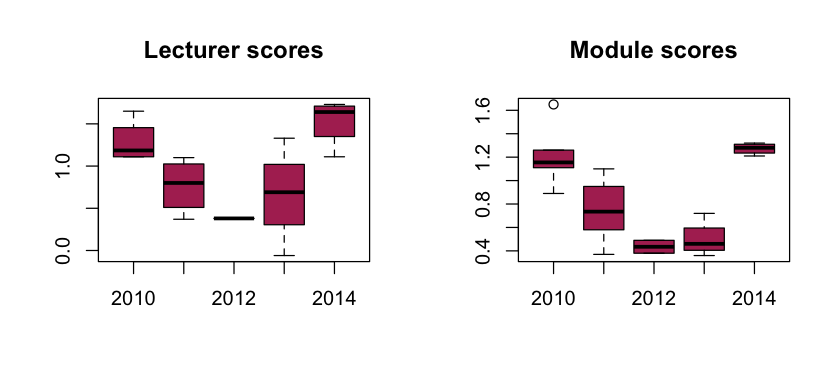

In [5]:
options(repr.plot.width=7, repr.plot.height=3.2)  # fit in browser display
par(mfrow=c(1,2))
boxplot(score~year, data=lecturer.scores, col="maroon", main="Lecturer scores")
boxplot(score~year, data=module.scores, col="maroon", main="Module scores")
par(mfrow=c(1,1))

## You can preload popular libraries

The ones available via Anaconda are [here](https://anaconda.org/r/packages) -- but
you don't need Anaconda to install R on Docker, it's just easier, and you don't need
to use Anaconda to install other R packages when you start with the Anaconda distribution.

In [ ]:
# names(feedback.topics) --> 'year' 'topic' 'fraction.of.feedback'
library(ggplot2)
ggplot(feedback.topics, aes(x = year, y = fraction.of.feedback, fill = topic)) + 
  geom_bar(stat = 'identity', position = 'stack')

## Students can immediately alter functions and try things on their own

So you can present them with functions and let them modify them ... and realistically alternate Theory → Worked example → Hands-on in class. (Or in a tutorial / demo at a conference).

In [ ]:
options(repr.plot.width=4.2, repr.plot.height=3.8)
class_year = 2010

show.feedback <- function(year, highlight, methodology) {
    df = feedback.topics[feedback.topics$year == year,]
    pie(df$fraction.of.feedback,
        labels=sprintf('%s\n%d%%', df$topic, round(df$fraction.of.feedback*100)),
        clockwise=T,
        col=ifelse(df$topic %in% highlight, 'maroon', 'lightgray'),
        main=sprintf('%d - %s',year, methodology))
}

In [ ]:
show.feedback(2010, c('Pace'), 'Traditional lecture style')
#show.feedback(2011, c('Pace', 'Support'), '3 extra hours of lab')
#show.feedback(2012, c('Lecturer', 'Material'), 'YouTube videos + in-class work')
#show.feedback(2013, c('Lecturer', 'Support'), 'Written lecture notes + in-class work')
#show.feedback(2014, c('Support'), '10-min. lectures + sticky notes + in-class work')

# Aside notes

By the way, yes Jupyter can present LaTeX markup (between `$$` symbols -- using the MathJax javascript library):

$$log(Q) = \alpha - \eta log(P)$$


## References

- C. T. Jacobs, G. J. Gorman, H. E. Rees, L. E. Craig (In Press). Experiences with efficient methodologies for teaching computer programming to geoscientists. Journal of Geoscience Education. Pre-print: http://arxiv.org/abs/1505.05425
- IRKernel: https://irkernel.github.io/
- Jupyter: http://jupyter.org/
- Jupyter's GitHub repositories
  - for [tmpnb] (no authentication; temporary notebooks)
  - for [JupyterHub] (login-authenticated; one account per user on the system)
  - for the Dockerfile that makes their [default Jupyter+R installation][r-dockerfile]
- Docker: https://www.docker.com/
  
[tmpnb]: https://github.com/jupyter/tmpnb
[JupyterHub]: https://github.com/jupyterhub
[r-dockerfile]: https://github.com/jupyter/docker-stacks/blob/master/r-notebook/Dockerfile